## Question-1

In this question, we will use the csv file **bank.csv**. 
- a. Read it into a data frame, call it `df`. (Import the packages you think you need).
- b. Drop the following columns:
    ['default','poutcome','y','housing','contact','day','month','duration','campaign','pdays','previous']

In [1]:
#### (a) Your code here
import pandas as pd
import csv
import string

with open ('bank.csv') as csv_bank:
    content= csv_bank.readlines()


content= [l.replace(';',' ') for l in content]
content=[l.strip('\n') for l in content]
content=[l.replace('"','') for l in content]
content=[l.split() for l in content]
for l in content:
    for item in l:
        item.split(' ')
        item.strip()

with open('new_bank.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(column_names)

    # write multiple rows
    writer.writerows(content)
    
#print(content[:20])

df = pd.read_csv('new_bank.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
#### (b) Your code here
df = df.drop(['default','poutcome','y','housing','contact','day','month','duration','campaign','pdays','previous'], axis=1)
df.head()

,age,job,marital,education,balance,loan
0,58,management,married,tertiary,2143,no
1,44,technician,single,secondary,29,no
2,33,entrepreneur,married,secondary,2,yes
3,47,blue-collar,married,unknown,1506,no
4,33,unknown,single,unknown,1,no


## Question-2
Try to discover this data:
- a. Find the number of rows and columns.
- b. Find the data type of each one of the columns.
- c. Find the total number of missing values and the number of missing values in each column if any (Note that "unknown" is considerd as missing value).
- d. Replace all missing values with the most common value in each columns 
- e. Find all unique values of each categorical column.
- f. Find the mean, min, max of each numerical column.

In [3]:
#### (a) Your code here
n_culumns= len(df.columns)
print("The number of Columns: %i" %n_culumns)
n_rows = len(df.values)
print("The number of rows is: %i " %n_rows)

The number of Columns: 6
The number of rows is: 45211 


In [4]:
#### (b) Your code here
type_of_data_by_column= df.dtypes
print(type_of_data_by_column)

age           int64
job          object
marital      object
education    object
balance       int64
loan         object
dtype: object


In [5]:
#### (c) Your code here
import numpy as np
df = df.replace("unknown", np.nan)
np.sum(df.isnull(), axis= 0)

age             0
job           288
marital         0
education    1857
balance         0
loan            0
dtype: int64

In [8]:
print('The total value of missing values is: ', np.sum(np.sum(df.isnull())))

The total value of missing values is:  2145


In [251]:
#### (d) Your code here:
##column_name(column with null values) column_id(column without values)

def filling_null (column_name, colum_id):
    types_of_job = df.groupby([column_name])[[colum_id]].count()
    column_common = types_of_job.sort_values(colum_id, ascending =False).index[0]
    return column_common

job_most_common = filling_null ('job', 'age')
education_most_common= filling_null('education','age')

df['job']= df['job'].fillna(job_most_common)
df['education'] = df['education'].fillna(education_most_common)

np.sum(df.isnull(), axis= 0)

age          0
job          0
marital      0
education    0
balance      0
loan         0
dtype: int64

In [252]:
#### (e) Your code here

for col in df.columns:
    print("\n The %s unique values are:" %col)
    print(df[col].unique())


 The age unique values are:
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

 The job unique values are:
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

 The marital unique values are:
['married' 'single' 'divorced']

 The education unique values are:
['tertiary' 'secondary' 'primary']

 The balance unique values are:
[ 2143    29     2 ...  8205 14204 16353]

 The loan unique values are:
['no' 'yes']


In [253]:
#### (f) Your code here

numerical_columns = set(df.select_dtypes(include=np.number))
for col in numerical_columns:
    print("\n"+ col.upper())
    print(df.agg(['mean','max','min'])[col])


AGE
mean    40.93621
max     95.00000
min     18.00000
Name: age, dtype: float64

BALANCE
mean      1362.272058
max     102127.000000
min      -8019.000000
Name: balance, dtype: float64


In [9]:
#easy way to do it
df.describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


## Question-3

- a. We learned that there is one more record. Add the information of the following record to the DataFrame:
        0,42,management,married,secondary,3266,no
- b. Verify that the new record was added to the end of the dataframe
- c. Drop all rows where education is primary.
- d. Reset the index and remove the new created column (index)


In [10]:
#### (a) Your code here
new_row = [42,'management','married','secondary',3266,'no']
df.loc[len(df.index)]= new_row

In [11]:
#### (b) Your code here
df.iloc[-1,:]

age                  42
job          management
marital         married
education     secondary
balance            3266
loan                 no
Name: 45211, dtype: object

In [12]:
### easy way to vizualized
df.tail()

,age,job,marital,education,balance,loan
45207,71,retired,divorced,primary,1729,no
45208,72,retired,married,secondary,5715,no
45209,57,blue-collar,married,secondary,668,no
45210,37,entrepreneur,married,secondary,2971,no
45211,42,management,married,secondary,3266,no


In [13]:
#### (c) Your code here
df = df.drop(df[df['education'] == 'primary'].index)
df['education'].unique()


array(['tertiary', 'secondary', nan], dtype=object)

In [260]:
#### (d) Your code here
df = df.reset_index() 
del df['index']
del df['level_0']
df.head()


,age,job,marital,education,balance,loan
0,58,management,married,tertiary,2143,no
1,44,technician,single,secondary,29,no
2,33,entrepreneur,married,secondary,2,yes
3,47,blue-collar,married,secondary,1506,no
4,33,blue-collar,single,secondary,1,no


## Question-4

- a. Find the number of people of 'secondary' education level.
- b. Compare between the average of the balance of married and single people
- c. Find the mean and the standard deviation of the balance of each education level.
- d. Find the mean and the standard deviation of the balance of each job.
- e. What is the average balance for different education groups and marital status?
- f. Compare between the number of people who had loan (married vs single)
- g. Which job has the lowest mean balance?
- h. Which job has the highest number of loans?


In [14]:
#### (a) Your code here
people_in_secondary = df[df['education'] == 'secondary'].age.count()
print("The number of people of secundary education leve is: %i" %people_in_secondary)

The number of people of secundary education leve is: 23203


In [15]:
#### (b) Your code here
sbalance = round(df[df['marital'] == 'single'].balance.mean(), 2)
mbalance = round(df[df['marital'] == 'married'].balance.mean(), 2)
diference = mbalance - sbalance
print('''The average of the balance of single people is: $%.2f 
The average of the balance of married people is: $%.2f 
The diference beetween the two groups is: $%.2f''' %(sbalance,mbalance,diference))


The average of the balance of single people is: $1313.67 
The average of the balance of married people is: $1459.27 
The diference beetween the two groups is: $145.60


In [16]:
#### (c) Your code here
mean_std_edu = df.groupby('education').balance.agg(['mean','std'])
mean_std_edu

,mean,std
education,,
secondary,1154.971771,2558.239150
tertiary,1758.416435,3839.088305


In [17]:
#### (d) Your code here
mean_std_job = df.groupby('job').balance.agg(['mean','std'])
mean_std_job

,mean,std
job,,
admin.,1144.488714,2673.269119
blue-collar,1074.248577,2200.028884
entrepreneur,1499.311350,4052.855186
housemaid,1662.561175,3595.206174
management,1766.711839,3843.539170
retired,2040.860449,4557.834171
self-employed,1676.433402,3792.758504
services,999.852192,2194.894642
student,1395.174497,2470.152290


In [18]:
#### (e) Your code here
material_education= df.groupby(['education', 'marital']).balance.mean().reset_index()
material_education

,education,marital,balance
0,secondary,divorced,902.772647
1,secondary,married,1251.896522
2,secondary,single,1060.546773
3,tertiary,divorced,1700.917063
4,tertiary,married,1848.779341
5,tertiary,single,1643.351210


In [21]:
#### (f) Your code here
loan_married_single = df.groupby(['loan','marital']).count()['age']
loan_married_single

loan  marital 
no    divorced     3634
      married     18125
      single      10382
yes   divorced      821
      married      3844
      single       1555
Name: age, dtype: int64

In [23]:
#### (g) Your code here
mean_std_job.reset_index()
minimun = mean_std_job['mean'].min()
mean_std_job[mean_std_job['mean']== minimun]

,mean,std
job,,
services,999.852192,2194.894642


In [24]:
#### (h) Your code here
mean_std_job.reset_index()
maximun = mean_std_job['mean'].max()
mean_std_job[mean_std_job['mean']== maximun]

,mean,std
job,,
retired,2040.860449,4557.834171


## Question-5

- a. Create the age histogram of married people
- b. Create a figure that shows the number of loans in each job category (try a horizontal plot)
- c. Visualize the relation between age and balance.
- d. Compare the age distribution for different marital status.


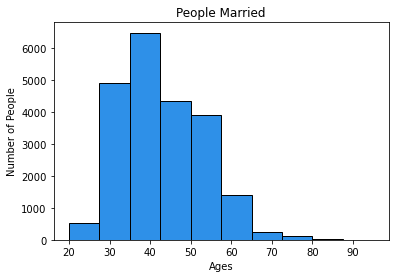

In [25]:
#### (a) Your code here
import matplotlib.pyplot as plt

plt.hist(df[df['marital'] == 'married'].age, color='#2E90E8', edgecolor='k')
plt.title('People Married')
plt.ylabel('Number of People')
plt.xlabel('Ages')
plt.show()

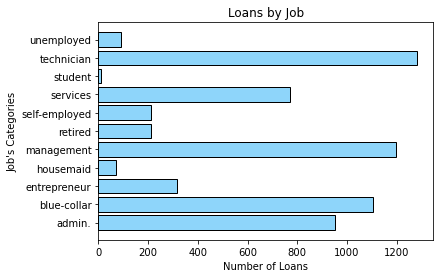

In [26]:
#### (b) Your code here
dm =df[df['loan']=='yes'].groupby(['job']).count()
dm = dm.reset_index()
plt.barh(dm.job,dm.loan, edgecolor='k', color='#8ED5FA')
plt.title('Loans by Job')
plt.ylabel('Job\'s Categories')
plt.xlabel('Number of Loans')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

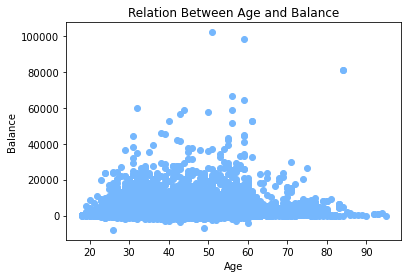

In [27]:
#### (c) Your code here
df.head()
plt.scatter(df.age, df.balance, color ='#75B7FD')
plt.title('Relation Between Age and Balance')
plt.ylabel('Balance')
plt.xlabel('Age')
plt.show

Text(0, 0.5, 'Ages')

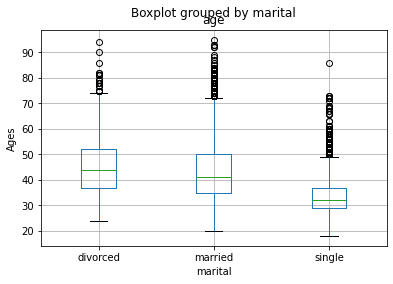

In [292]:
#### (d) Your code here
df.boxplot(by='marital', column='age')
plt.ylabel('Ages')